In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
gray_img = './images/lena.jpg'
color_img = './images/rgb.png'

In [3]:
img_gray = cv2.imread(gray_img, cv2.IMREAD_GRAYSCALE)

In [4]:
img_col = cv2.imread(color_img)

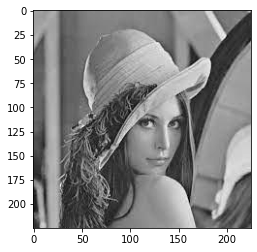

In [5]:
plt.imshow(img_gray,cmap='gray')

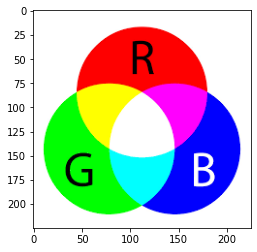

In [6]:
plt.imshow(img_col[:,:,::-1]) # since open cv takes the image as BGR format

In [7]:
# plt.imshow(img_col)

## Scaling

resizing the image using resize method

In [8]:
# making the width double and height half the original size

img_gray_resized = cv2.resize(img_gray,fx=2,fy=0.5,dsize=None)

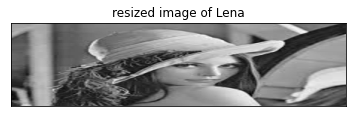

In [9]:
plt.imshow(img_gray_resized,cmap='gray')
plt.xticks([])
plt.yticks([])
plt.title('resized image of Lena')
plt.show()

In [10]:
img_gray_resized.shape

(112, 450)

In [11]:
img_gray.shape

(225, 225)

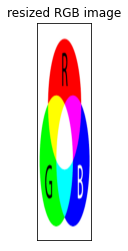

In [12]:
img_color_resized = cv2.resize(src=img_col,fx=0.5,fy=2,dsize=None)

plt.imshow(img_color_resized[:,:,::-1])
plt.xticks([])
plt.yticks([])
plt.title('resized RGB image')
plt.show()

In [13]:
# zooming the image by 2X

img_gray_resized_double = cv2.resize(img_gray,fx=2,fy=2,dsize=None)


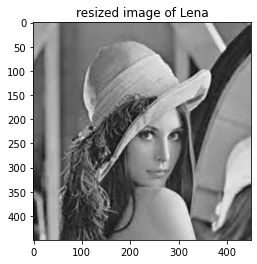

In [14]:

plt.imshow(img_gray_resized_double,cmap='gray')
# plt.xticks([])
# plt.yticks([])
plt.title('resized image of Lena')
plt.show()

In [15]:
img_gray_resized_double.shape

(450, 450)

In [16]:
## scaling illustration

In [17]:
P = np.array([2,4])
Sx,Sy = 2,2

In [18]:
# creating a scaling matrix

S = np.array([[Sx,0],[0,Sy]])

In [19]:
S

array([[2, 0],
       [0, 2]])

In [20]:
# matrix multiplication

P_dash = S.dot(P)

In [21]:
P_dash

array([4, 8])

In [22]:
# a snippet that does the scaling

def scale(inputs,Sx,Sy):
    '''
    inputs: an input vector
    Sx: Scaling in X direction
    Sy: Scaling in Y direction
    ---------------------------
    Returns a vector after scaling
    '''
    S = np.array([[Sx,0],[0,Sy]])
    output = S.dot(inputs)
    return output

In [23]:
scale([2,3],2,3)

array([4, 9])

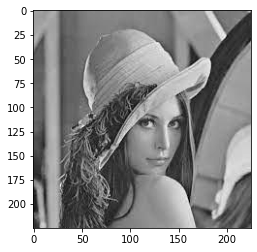

In [24]:
plt.imshow(img_gray,cmap='gray')

In [25]:
num_rows = img_gray.shape[0]
num_cols = img_gray.shape[1]

In [26]:
print('number of rows is: ',num_rows)
print('number of columns is: ',num_cols)

number of rows is:  225
number of columns is:  225


In [27]:
# first create a blank matrix of the same size as the original image
img_gray_copy = np.zeros((num_rows,num_cols),dtype='uint8')

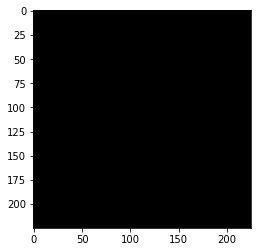

In [28]:
plt.imshow(img_gray_copy,cmap='gray')

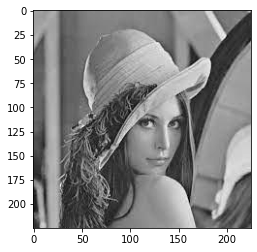

In [29]:
for row in range(num_rows):
    for col in range(num_cols):
        img_gray_copy[row,col]=img_gray[row,col] # copying the intensity from the source to destination image
plt.imshow(img_gray_copy,cmap='gray')

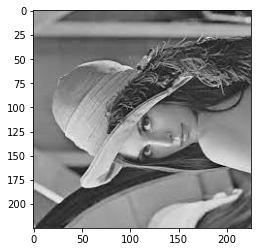

In [30]:
# flipping the image

for row in range(num_rows):
    for col in range(num_cols):
        img_gray_copy[col,row]=img_gray[row,col] # copying the intensity from the source to destination image
plt.imshow(img_gray_copy,cmap='gray')

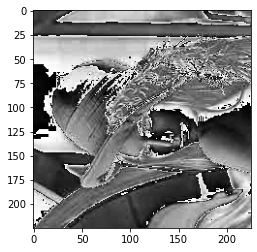

In [31]:
# flipping the image

for row in range(num_rows):
    for col in range(num_cols):
        img_gray_copy[col,row]=img_gray[row,col]*2 # copying the intensity from the source to destination image
plt.imshow(img_gray_copy,cmap='gray')

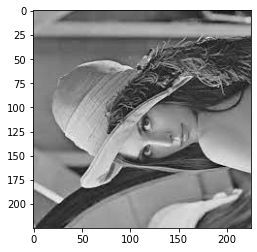

In [32]:
# flipping the image

for row in range(num_rows):
    for col in range(num_cols):
        img_gray_copy[col,row]=img_gray[row,col]*0.5 # copying the intensity from the source to destination image
plt.imshow(img_gray_copy,cmap='gray')

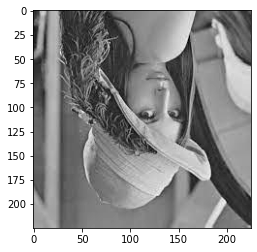

In [33]:
# flipping the image

for row in range(num_rows):
    for col in range(num_cols):
        img_gray_copy[num_rows-row-1,col]=img_gray[row,col] # copying the intensity from the source to destination image
plt.imshow(img_gray_copy,cmap='gray')

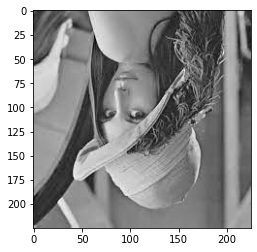

In [34]:
# flipping the image

for row in range(num_rows):
    for col in range(num_cols):
        img_gray_copy[num_rows-row-1,num_cols-col-1]=img_gray[row,col] # copying the intensity from the source to destination image
plt.imshow(img_gray_copy,cmap='gray')

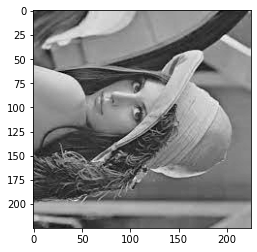

In [35]:
# flipping the image

for row in range(num_rows):
    for col in range(num_cols):
        img_gray_copy[num_rows-col-1,num_cols-row-1]=img_gray[row,col]*0.5 # copying the intensity from the source to destination image
plt.imshow(img_gray_copy,cmap='gray')

### Cropping the image to half using python

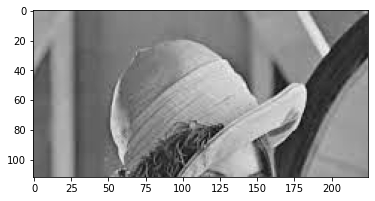

In [37]:
img_gray_cropped = np.zeros((int(num_rows/2),num_cols),dtype='uint8')

for row in range(int(num_rows/2)):
    for col in range(num_cols):
        img_gray_cropped[row,col]=img_gray[row,col] # copying the intensity from the source to destination image
plt.imshow(img_gray_cropped,cmap='gray')

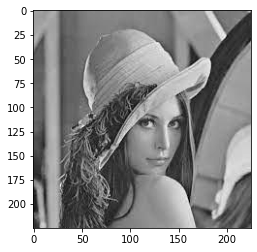

In [38]:
plt.imshow(img_gray,cmap='gray')

### Mirroring the image


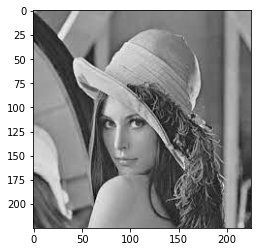

In [39]:
for row in range(num_rows):
    for col in range(num_cols):
        img_gray_copy[row,num_cols-col-1]=img_gray[row,col] # copying the intensity from the source to destination image
plt.imshow(img_gray_copy,cmap='gray')

In [40]:
# setting the scaling matrix

In [41]:
S = np.array([[2,0],[0,2]])

In [43]:
img_doubled = np.zeros((2*num_rows,2*num_cols),dtype='uint8')

In [66]:
 for row in range(num_rows):
        for col in range(num_cols):
            p = np.array([row,col])
            p_dash = S.dot(p)
            new_row = p_dash[0]
            new_col = p_dash[1]
            img_doubled[new_row,new_col]=img_gray[row,col]
            # in this case there are certain destination coordinates that are never touched that acts as a holes

### Impact of Holes

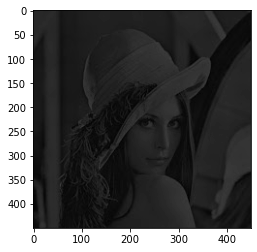

In [47]:
plt.imshow(img_doubled,cmap='gray') # we can see the impact of holes

In [46]:
img_doubled.shape

(450, 450)

In [48]:
## function to display the image in its actual size

In [49]:
import matplotlib as mpl


def dispalyImgInActualSize(img):
    dpi = mpl.rcParams['figure.dpi']
    H,W = img.shape # num_rows,num_cols
    
    # What size does the figure need to be in inches to fit the image?
    figsize = W/float(dpi), H/float(dpi) #gives figure size in inches
    
    # Create a figure of the right size with one axes that takes up the full figure
    fig = plt.figure(figsize = figsize)
    ax = fig.add_axes([0,0,1,1]) # fitting original image into the axes
    
    # Hide spines, ticks, etc.
    ax.axis('off')
    
    # display the image
    ax.imshow(img,cmap='gray')
    plt.show

    

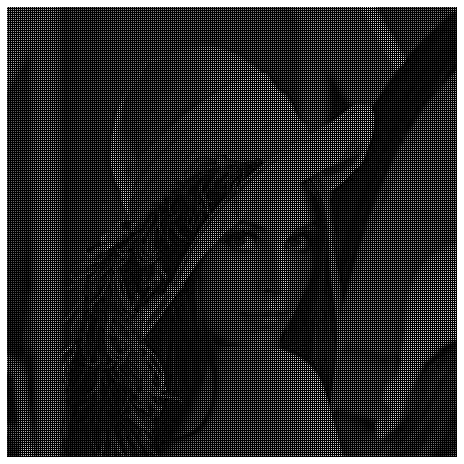

In [51]:
dispalyImgInActualSize(img_doubled) # here we can see the effect of holes clearly

In [52]:
dpi = mpl.rcParams['figure.dpi']
print(dpi)

72.0


In [53]:
img_doubled.shape

(450, 450)

### Inverse Scaling

#### Nearest Neighbor Interpolation

there will be no holes beacause we will be looping over destination image instead of source image

#### Using the Floor function for rounding

In [77]:
# get the number of rows and num of col from the original image

num_rows = img_gray.shape[0]
num_cols = img_gray.shape[1]

# setting the scaling matrix

S = np.array([[2,0],[0,2]])

# making the size of the destination image double than the source image

img_doubled = np.zeros((2*num_rows,2*num_cols),dtype='uint8')

# computing the inverse matrix

S_inv = np.linalg.inv(S)

# we shall be looping over the destination image

for new_row in range(img_doubled.shape[0]):
    for new_col in range(img_doubled.shape[1]):
        # mapping of 10x10 pixels to 5x5 pixels
        
        p_dash = np.array([new_row,new_col])
        p = S_inv.dot(p_dash)

        # p could either be continuous or discrete,, 
        # let us use the floor method to get the integer value

        p = np.int16(np.floor(p))

        row = p[0]
        col = p[1]
#         print(row,col)
#         img_doubled[row,col]=img_gray[new_row,new_col]
        img_doubled[new_row,new_col] = img_gray[row,col]

In [78]:
# # to calculate the iverse of a matrix we can use the linalg package of the np

# S_inv = np.linalg.inv(S)
# S_inv

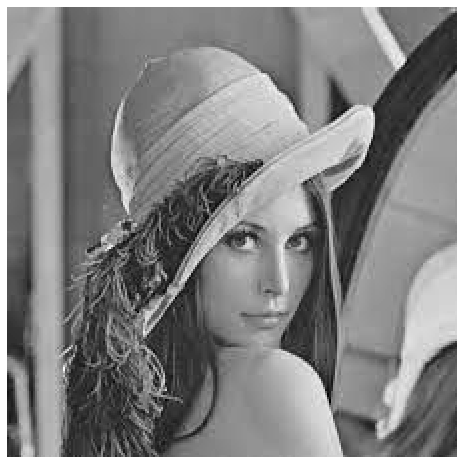

In [81]:
dispalyImgInActualSize(img_doubled) 

### Changing the floor function to round fucntion


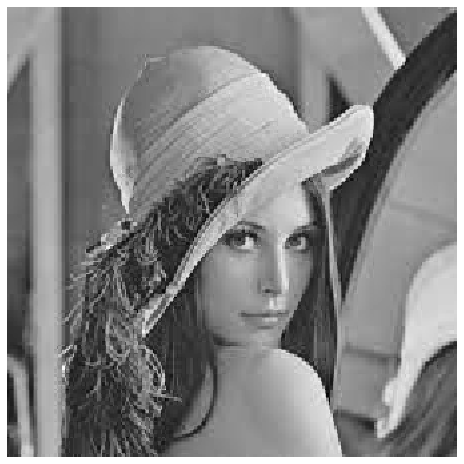

In [101]:

# get the number of rows and num of col from the original image

num_rows = img_gray.shape[0]
num_cols = img_gray.shape[1]

# setting the scaling matrix

S = np.array([[2,0],[0,2]])

# making the size of the destination image double than the source image

img_doubled = np.zeros((2*num_rows,2*num_cols),dtype='uint8')

# computing the inverse matrix

S_inv = np.linalg.inv(S)

# we shall be looping over the destination image

for new_row in range(img_doubled.shape[0]):
    for new_col in range(img_doubled.shape[1]):
        p_dash = np.array([new_row,new_col])
        p = S_inv.dot(p_dash)

        # p could either be continuous or discrete,, 
        # let us use the floor method to get the integer value

        p = np.int16(np.round(p))

        row = p[0]
        col = p[1]
        
        # performing a boundary check
        
        if row<0 or row>=num_rows or col<0 or col>=num_cols:
            # do nothing
            pass
        else:
            # display the image
            img_doubled[new_row,new_col] = img_gray[row,col]

#         print(row,col)
#         img_doubled[row,col]=img_gray[new_row,new_col]
    
dispalyImgInActualSize(img_doubled)

In [90]:
# difference between round, floor and ceil 

In [84]:
np.floor(2.3)

2.0

In [85]:
np.ceil(2.3)

3.0

In [86]:
np.round(2.3)

2.0

In [89]:
np.round(2.5) # makes it to lower value if <=0.5

2.0

In [92]:
np.round(2.6)

3.0

In [ ]:
### making the image brighter than the original image instead of darker as created by the hole

In [40]:
# setting the scaling matrix

In [94]:
S = np.array([[2,0],[0,2]])

In [99]:
# alternatively for generating matrix with all 255 pixels in it we can do the following:

# img_doubled = np.ones((2*num_rows,2*num_cols),dtype='uint8')*255

In [95]:
img_doubled = np.full((2*num_rows,2*num_cols),255)

In [96]:
 for row in range(num_rows):
        for col in range(num_cols):
            p = np.array([row,col])
            p_dash = S.dot(p)
            new_row = p_dash[0]
            new_col = p_dash[1]
            img_doubled[new_row,new_col]=img_gray[row,col]
            # in this case there are certain destination coordinates that are never touched that acts as a holes

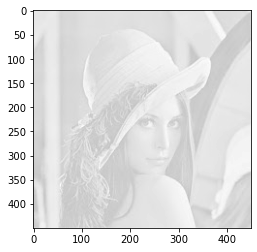

In [98]:
plt.imshow(img_doubled,cmap='gray') # we can see the impact of white holes as you may call